
# Project: Investigate the No-Show Appointement Dataset 

## Table of Contents
<ul>
<li><a href="#intro">A. Introduction</a></li>
<li><a href="#wrangling">B. Data Wrangling</a></li>
<li><a href="#eda">C. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">D. Conclusions</a></li>
</ul>

<a id='intro'></a>
## A. Introduction

in Brazil persons make a docotor appointement but dont show-up. This dataset and its 14 variables (characteristics) collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. <br>

The variables of this data set are : <br>

__PatientId__ : Identification of a patient <br>
__AppointmentID__ : Identification of each appointment <br>
__Gender__ : Male or Female <br>
__ScheduledDay__ : The day someone called or registered the appointment, this is before appointment of course <br>
__AppointmentDay__ : The day of the actuall appointment, when they have to visit the doctor <br>
__Age__ : How old is the patient <br>
__Neighbourhood__ : Where the appointment takes place <br>
__Scholarship__ : True(1) or False(0) 'True' if the patient is recipient of the social welfare program by the government of Brazil <br> 
__Hipertension__ : True(1) or False(0) <br>
__Diabetes__ : True(1) or False(0) <br>
__Alcoholism__ : True(1) or False(0) <br>
__Handcap__ : True(1) or False(0) <br>
__SMS_received__ : 1 or more messages sent to the patient <br>
__No-show__ : Yes or No it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up <br>

* __Question 1 : Is there any relation between receipt of social welfare and showing to appointment ?__
* __Question 2 : Is there any relation between gender and no show ?__
* __Question 3 : Is there any relation between the waiting period and no_show ?__




In [2]:
#importing pandas, numpy, and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

 I used the previous cell to import the packages that I am going to use through the analysis : __pandas , numpy and matplotlib.pyplot__ <br>
 I also added the line __(% matplotlib inline)__ to be ablse to plot visualizations on the same notebook

<a id='wrangling'></a>
## B. Data Wrangling

This section of the report is devoted to : <br>
* Loading in the data <br>
* checking for cleanliness, and then triming and cleaning the dataset for analysis. 

### General Properties

In [3]:
# importing the csv file 'noshowappointments-kagglev2-may-2016.csv' as pandas's dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


I loaded the data and printed out a 3 lines. Let's now perform some operations to inspect data


In [4]:
# Showing how many columns and rows are in the dataset
df.shape

(110527, 14)

This dataset contains : <br>
    __110527 rows <br>
    14 columns <br>__

In [5]:
# Printing the columns of the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

__To do in next steps : cleaning names of the columns :__ <br> 
names of columns should be lowercase <br>
I should also rename the column 'No-show' using '_' in place of '-'


In [6]:
# Printing data types of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

After checking data types :

__'PatientId'__ data type should be changed to __'int'__ instead of __'float'__ <br> 
__'ScheduledDay'__ and __'AppointmentDay'__ data type should be changed to __'datetime'__

In [7]:
# Checking how many duplicated rows are in the dataset
df.duplicated().sum()

0

The previous code cell shows there is no duplicated rows in the dataset

In [8]:
# Checking how many null values are in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The previous code cell  shows there is no null values in the dataset




### Data Cleaning 

In this section I will : <br>
* Clean names of the columns by apply lowercase to all columns ,and rename the'No-show' column 
* Chgange data type  : __'PatientId'__ to __'int'__ instead of __'float'__ and  both __'ScheduledDay'__ and __'AppointmentDay'__ to __'datetime'__

In [9]:
# Applying lower case to all columns
df.rename(columns = lambda x:x.strip().lower() , inplace = True)

Apply lowercase to all columns

In [10]:
# Rename 'no-show' column
df.rename(columns={'no-show': 'no_show'} , inplace=True)

renaming the column __'No-show'__
using '_' in place of '-' 

In [11]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Checking if changes apply : all columns are lower case and '_' is used instead of '-'

In [12]:
# Change 'patientid' data type to integer
df['patientid'] = df['patientid'].astype(int)

In [13]:
# Change 'scheduledday' and 'appointmentday' data type to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

I changed data type of : <br>
__'patientid'__ to int <br>
__'scheduledday'__ and __'appointmentday'__ to datetime <br>

In [14]:
# Checking data types
df.dtypes

patientid                  int64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

Checking if changes apply : 'patientid' is now integer and both 'scheduledday' and 'appointmentday' are datetime

<a id='eda'></a>
## C. Exploratory Data Analysis

Now that I've cleaned the dataset, I'm ready to move on to exploration. In this part I will compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 

## Question 1 : Is there any relation between receipt of social welfare and showing to appointment ? 

Let's first investigate the count of recipients of the Bolsa support vs non-recipients <br> 

In [15]:
# Use a mask to calculate the number of bolsa recipients in the dataset
bolsa = df[df['scholarship'] == 1]
bolsa_count = bolsa['scholarship'].count()
bolsa_count

10861

In [16]:
# Use a mask to calculate number of patients who are not recipients of bolsa
no_bolsa = df[df['scholarship'] == 0]
no_bolsa_count = no_bolsa['scholarship'].count()
no_bolsa_count

99666

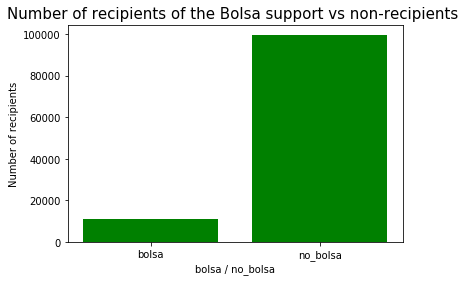

In [17]:
# Bar plot of 'Number of recipients of the Bolsa support vs non-recipients'
locations = [1, 2]
heights = [bolsa_count, no_bolsa_count]
labels = ['bolsa', 'no_bolsa']
plt.bar(locations, heights, tick_label=labels, color = 'green')
plt.title('Number of recipients of the Bolsa support vs non-recipients ' , fontsize = 15)
plt.xlabel('bolsa / no_bolsa')
plt.ylabel('Number of recipients');

The large part of patients do not receive a government social welfare <br>
Let's plot a pie chart to figure out the composition of bolsa recepients patients regarding the show-up or not to the appointment

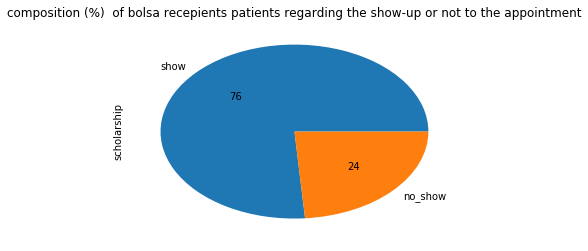

In [18]:
# Calculate the composition (%)  of bolsa recepients patients regarding the show-up or not to the appointment
df_bolsa = df[df['scholarship'] == 1] # this data frame corresponds to patients who receive bolsa
df_blosa_show = df_bolsa.groupby('no_show')['scholarship'].count()
df_blosa_show.plot(kind='pie', autopct='%.0f', labels=['show','no_show'], title='composition (%)  of bolsa recepients patients regarding the show-up or not to the appointment', fontsize=10)


For patients who receive bolsa 76% show-up to appointment however 24% do not show_up

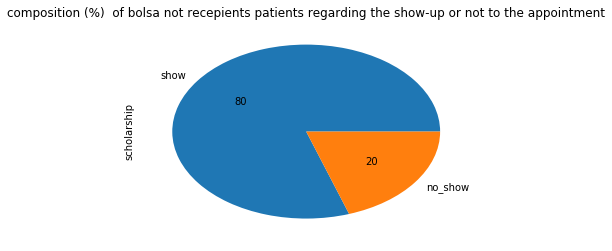

In [19]:
# Calculate the composition (%)  of bolsa not recepients patients regarding the show-up or not to the appointment
df_nobolsa = df[df['scholarship'] == 0] # this data frame corresponds to patients who dont receive bolsa
df_noblosa_show = df_nobolsa.groupby('no_show')['scholarship'].count()
df_noblosa_show.plot(kind='pie', autopct='%.0f', labels=['show','no_show'], title='composition (%)  of bolsa not recepients patients regarding the show-up or not to the appointment', fontsize=10)


For patients who don't receive bolsa 80% show-up to appointment however 20% do not show_up.



## Question 2 : Is there any relation between gender and no show 

Before diving to answering this question let's start by comparing the proportion of men and women in the dataset. Are women caring more about their health comparing to men ?

Let's calculate the proportion of women and men in the dataset

In [20]:
total_F = df.query('gender == "F" ')['patientid'].count()
total_M = df.query('gender == "M" ')['patientid'].count()
avg_total_F = total_F/ (total_F+total_M)*100
avg_total_M = total_M/ (total_F+total_M)*100
print (avg_total_F , avg_total_M )

64.9976928714 35.0023071286


The proportion of women is about __65%__ and the proportion of men is __35%__. Let's plot this result using matplotlib.plyplot

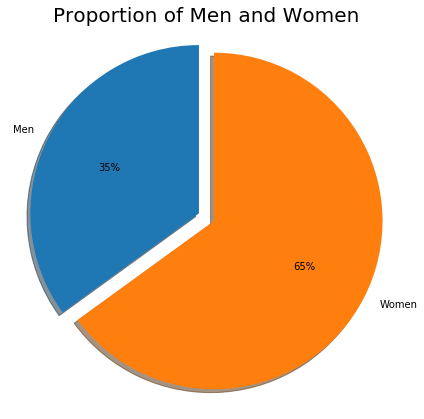

In [21]:
# Pie chart plot of 'Proportion of Men and Women'
labels = 'Men', 'Women', 
proportion = [35, 65]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'women')

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(proportion, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Proportion of Men and Women" , fontsize = 20)
plt.show()
# document : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html

__Female is the greater proportion,that means women take more care of their health in comparison to men__ <br> Let's now see if there is a relation between gender and no show

In [22]:
no_show_F = df.query('no_show == "Yes" & gender == "F" ')['patientid'].count() #claculate the number of women who doesn't show to the appointment 
show_F = df.query('no_show == "No" & gender == "F" ')['patientid'].count() #claculate the number of women who show to the appointment
total_F = df.query('gender == "F" ')['patientid'].count() #calculate the total number of rows corresponding to female gender

avg_no_show_F = no_show_F / total_F*100 # calculate the average number of no show 
avg_show_F = show_F /total_F*100 # calculate the average number of show 
print (avg_no_show_F , avg_show_F)

20.3145879733 79.6854120267


I definded new variables for women : <br>
no_show_F : claculate the number of women who doesn't show to the appointment <br>
show_F : claculate the number of women who show to the appointment

After this I calculated the average number of no show and the average number of show


In [23]:
no_show_M = df.query('no_show == "Yes" & gender == "M" ')['patientid'].count() #claculate the number of men who doesn't show to the appointment 
show_M = df.query('no_show == "No" & gender == "M" ')['patientid'].count() #claculate the number of men who show to the appointment
total_M = df.query('gender == "M" ')['patientid'].count() #calculate the total number of rows corresponding to male gender


avg_no_show_M = no_show_M / total_M*100 # calculate the average number of no show 
avg_show_M = show_M /total_M*100 # calculate the average number of show
print (avg_no_show_M , avg_show_M)

19.9679478895 80.0320521105


I definded new variables for men :
no_show_M : claculate the number of men who doesn't show to the appointment <br>
show_M : claculate the number of men who show to the appointment

After this I calculated the average number of no show and the average number of show


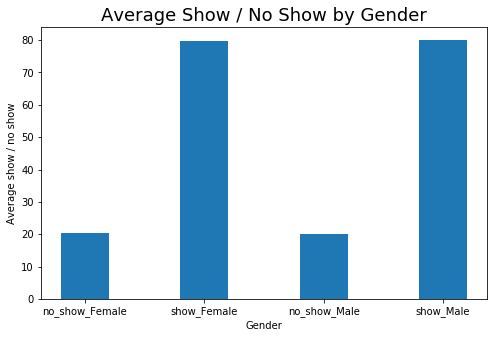

In [24]:
#Plot bar chart
locations = [1, 3 , 5, 7]
heights = [avg_no_show_F, avg_show_F, avg_no_show_M , avg_show_M]
labels = ['no_show_Female', 'show_Female', 'no_show_Male' , 'show_Male']
plt.subplots(figsize=(8, 5))
plt.bar(locations, heights, tick_label=labels )
plt.title('Average Show / No Show by Gender' , fontsize = 18)
plt.xlabel('Gender')
plt.ylabel('Average show / no show');

According to the bar chart : <br> no show average is about 20% for both man and women <br> show average is about 80% for both men and women <br> 

## Question 3 : Is there any relation between the waiting period and no_show ? <br>

To answer this question Iwill introduce a new variable : waiting_period


In [25]:
# extracting just date from datetime culumns
df['appointmentday'] = df['appointmentday'].dt.date
df['scheduledday'] = df['scheduledday'].dt.date

In the previous cell I used .dt.date to keep just the date from 'appointmentday' and 'scheduledday'

In [26]:
# calculate the number of days between scheduled day and appointment day
df['waiting_period'] = df['appointmentday'] - df['scheduledday']

I added a new variable 'waiting_period' wich calculate the number of days between scheduled day and appointment day. <br> All values of the 'waiting_period' should be positive

In [27]:
df['waiting_period'].describe()

count                     110527
mean     10 days 04:24:31.828602
std      15 days 06:07:11.673762
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: waiting_period, dtype: object

It's seems there are some negative values. <br>
Let's clean the dataset by dropping the rows corresponding to the neagative values of 'waiting_period'

In [28]:
# change data type to string
df['waiting_period'] = df['waiting_period'].astype(str)

In [29]:
# extract integer from string
df['waiting_period'] = df['waiting_period'].str.extract('(\d+)').astype(int)

In the two previous cells I changed the 'waiting_period' data type to string before extracting the number of waiting days as integer

In [30]:
# Clean dataset by removing negative values 
df = df[df['waiting_period'] >= 0 ]

I removed the rows corresponding to neagative values of 'waiting_period'

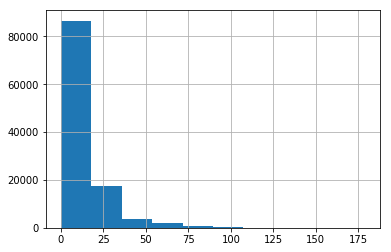

In [31]:
df['waiting_period'].hist()

the histogram plotting shows that the distribution of 'waiting_period' is skewded to the right

In [32]:
# calculate the mean waiting period for both show and no-show patients
show_wait_prd = df.query('no_show == "No" ')['waiting_period'].mean() 
no_show_wait_prd = df.query('no_show == "Yes" ')['waiting_period'].mean() 
print (show_wait_prd, no_show_wait_prd)

8.75465944132 15.8323849635


The average waiting period corresponding to __show__ is about __9 days__. However the average waiting period corresponding to __no_show__ is about __16 days__ .<br>

<a id='conclusions'></a>
## D. Conclusions
After analysis we can conclude : <br> <br>
* For question 1 we wonder if there was any relation between receipt of social welfare and showing to appointment. the analysis of the dataset showed that for patients who don't receive bolsa 80% show-up to appointment however 20% do not show_up. And for those who receive bolsa 76% show-up to appointment but 24% do not show_up. Results for both are close we can not really conclude there is an impact of bolsa receipt on the showing-up to ppointment.
<br>
<br>
* For question 2 we tried to figure out if there was any relation between gender and no show. We started the analysis by comparing the proportion of men and women in the dataset, and we found that __Female is the greater proportion (65%) comparing to men(35%),that means women take more care of their health in comparison to men__. We provided more analysis to see if there is a relation between gender and no show the results shows thar there is no relation betwen the two variables. <br> <br>

* For the last question we tried to figure out the relation betwen the'waiting-period' before the appointment day get  and the no_show. As a result we found that __the average waiting period corresponding to show was about 9 days. However the average waiting period corresponding to no_show is about 16 days__. We can note that in this case, the means are quite far. However comparing means is not sufficient to conclude that there is a statistically significant difference between the samples. Various factors could cause this like differences in sample size or outliers.<br><br>

* Also ther are some limitations to this analysis, like the dataset size (100k rows) wich is not representative of the population of Brazil . Also there are data entry issues like negative waiting periods and negative ages.



In [94]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0